## Question 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

### Import csv into dataframe

In [2]:
df = pd.read_csv("spenddata.csv")
df_test = pd.read_csv("testdata.csv")

In [3]:
df.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,...,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,...,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,...,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,...,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,...,0,0,0,0,0,0,0,0,5.0,NaN


In [4]:
df_test.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,9,1,1.0,NaN,1,11,1,47,8,2,...,0,0,0,0,0,0,0,1,0,3.0
1,15,1,2.0,NaN,1,11,1,65,27,1,...,0,1,0,0,0,0,0,0,0,3.0
2,16,1,2.0,NaN,1,6,1,65,27,2,...,0,0,0,0,0,0,0,1,0,3.0
3,24,1,1.0,NaN,1,3,1,3,2,1,...,0,0,0,0,0,0,0,0,0,NaN
4,32,1,1.0,NaN,1,5,1,83,3,1,...,0,1,0,0,0,1,0,0,0,NaN


### Creation of Dummy Variable + Remove Columns not Used
The dummy variables are used to replace the text variables, such that they can be used for computation in the subsequent steps. Columns that will not be used for computation will also be removed. These columns do not add any value in the clustering algorithm. 

In [5]:
def dummy_var9(value):
    if value == "Mono":
        return 1
    elif value == "Multi":
        return 2
    else:
        return 0

df["var9_int"] = df["var9"].apply(dummy_var9)

## remove columns that do not add value
df.drop(columns = ["var9", "month", "Unnamed: 0", "year", "respondent.id"], 
        inplace = True)

df.head()

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int
0,2.0,NaN,1,5,1,57,34,1,NaN,1,...,0,0,0,1,0,0,0,5.0,NaN,1
1,2.0,NaN,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,1,0,NaN,NaN,1
2,2.0,NaN,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,3.0,NaN,2
3,2.0,NaN,1,6,1,57,34,2,4.0,1,...,0,0,0,1,0,1,0,5.0,NaN,1
4,2.0,NaN,1,8,1,22,1,1,NaN,1,...,0,0,0,0,0,0,0,5.0,NaN,2


In [6]:
df_test["var9_int"] = df_test["var9"].apply(dummy_var9)

## remove columns that do not add value
df_test.drop(columns = ["var9", "month", "Unnamed: 0", "year", "respondent.id"], 
             inplace = True)

df_test.head()

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,var9_int
0,1.0,NaN,1,11,1,47,8,2,1.0,1,...,0,0,0,0,0,0,1,0,3.0,0
1,2.0,NaN,1,11,1,65,27,1,NaN,1,...,1,0,0,0,0,0,0,0,3.0,1
2,2.0,NaN,1,6,1,65,27,2,1.0,1,...,0,0,0,0,0,0,1,0,3.0,1
3,1.0,NaN,1,3,1,3,2,1,NaN,1,...,0,0,0,0,0,0,0,0,NaN,0
4,1.0,NaN,1,5,1,83,3,1,NaN,1,...,1,0,0,0,1,0,0,0,NaN,2


### Replacing NaN values with 0
This is such that it can be used to calculate the standardised values. In this case, we assume that the columns are not binary. Thus, changing the NaN values to 0 will not "change" the value of the data. 

In [7]:
# replacing all NaN values with 0
df.fillna(0, inplace = True)
df.head()

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int
0,2.0,0.0,1,5,1,57,34,1,0.0,1,...,0,0,0,1,0,0,0,5.0,0.0,1
1,2.0,0.0,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,1,0,0.0,0.0,1
2,2.0,0.0,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,3.0,0.0,2
3,2.0,0.0,1,6,1,57,34,2,4.0,1,...,0,0,0,1,0,1,0,5.0,0.0,1
4,2.0,0.0,1,8,1,22,1,1,0.0,1,...,0,0,0,0,0,0,0,5.0,0.0,2


In [8]:
df_test.fillna(0, inplace = True)
df_test.head()

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,var9_int
0,1.0,0.0,1,11,1,47,8,2,1.0,1,...,0,0,0,0,0,0,1,0,3.0,0
1,2.0,0.0,1,11,1,65,27,1,0.0,1,...,1,0,0,0,0,0,0,0,3.0,1
2,2.0,0.0,1,6,1,65,27,2,1.0,1,...,0,0,0,0,0,0,1,0,3.0,1
3,1.0,0.0,1,3,1,3,2,1,0.0,1,...,0,0,0,0,0,0,0,0,0.0,0
4,1.0,0.0,1,5,1,83,3,1,0.0,1,...,1,0,0,0,1,0,0,0,0.0,2


### Split data in train and test
Data in <i>df</i> is split into training and testing

In [9]:
X_train, X_test = train_test_split(df, 
                                   test_size = 0.3, 
                                   random_state = 101)

### Trying out different Naive Bayes Models
The following models are tried out:
- Gaussian Model
- Multinomial Model
- Bernoulli Model

The model which can give the highest accuracy score and a good f1 metric will be used for the <i>testdata</i> dataset.

#### <i>Get a common set of variables to use</i>
The variables should not include "pov6" and should be found in testdata.csv

In [10]:
headers = df.columns
test_columns = df_test.columns

variables = []

for x in headers:
    if x != "pov6" and x in test_columns:
        variables.append(x)

# variables

#### Gaussian Model

In [11]:
gaussian = GaussianNB()

gaussian.fit(X_train[variables].values, X_train["pov6"])
prediction = gaussian.predict(X_test[variables])

X_test["predict"] = prediction
X_test

C:\Users\theta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int,predict
3474,1.0,0.0,1,4,1,115,28,1,0.0,1,...,0,0,0,0,0,0,0.0,0.0,2,1
11305,2.0,0.0,1,4,1,79,22,2,3.0,1,...,0,0,1,0,0,0,0.0,0.0,1,1
9253,0.0,0.0,1,7,1,123,31,1,0.0,1,...,0,0,0,0,0,0,3.0,0.0,1,1
17172,1.0,0.0,1,8,1,3,2,1,0.0,1,...,0,0,0,0,0,0,3.0,0.0,2,1
2778,1.0,0.0,1,8,1,79,22,2,1.0,1,...,0,0,0,0,0,0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15741,1.0,0.0,1,7,1,8,18,2,3.0,1,...,0,0,0,0,0,0,3.0,0.0,2,1
9988,3.0,0.0,1,8,1,16,17,1,0.0,1,...,1,0,1,1,0,0,5.0,0.0,1,1
10779,0.0,0.0,1,3,1,54,30,1,0.0,1,...,0,0,0,0,0,0,1.0,0.0,1,1
10128,3.0,0.0,1,6,1,106,13,1,0.0,1,...,0,0,1,0,0,0,3.0,0.0,2,1


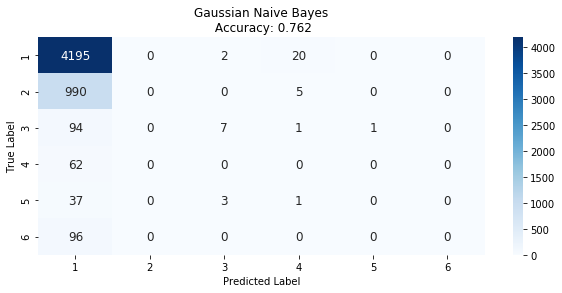

              precision    recall  f1-score   support

           1       0.77      0.99      0.87      4217
           2       0.00      0.00      0.00       995
           3       0.58      0.07      0.12       103
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        96

    accuracy                           0.76      5514
   macro avg       0.22      0.18      0.16      5514
weighted avg       0.60      0.76      0.66      5514



C:\Users\theta\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
cm = confusion_matrix(X_test["pov6"], X_test["predict"])

# Plot the confusion matrix
cm_df = pd.DataFrame(cm, 
                     index = [1,2,3,4,5,6], 
                     columns = [1,2,3,4,5,6])

plt.figure(figsize = (10,4))
sns.heatmap(cm_df, 
            annot = True, 
            cmap = "Blues", 
            fmt = 'g', 
            annot_kws = {"size" : 12})

plt.title("Gaussian Naive Bayes\n Accuracy: {0:.3f}".format(accuracy_score(X_test["pov6"], 
                                                                           X_test["predict"])))

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print(classification_report(X_test["pov6"], X_test["predict"]))

#### Multinomial Model

In [13]:
multinomial = MultinomialNB()

multinomial.fit(X_train[variables].values, X_train["pov6"])
prediction = multinomial.predict(X_test[variables])

X_test["predict"] = prediction
X_test

C:\Users\theta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int,predict
3474,1.0,0.0,1,4,1,115,28,1,0.0,1,...,0,0,0,0,0,0,0.0,0.0,2,2
11305,2.0,0.0,1,4,1,79,22,2,3.0,1,...,0,0,1,0,0,0,0.0,0.0,1,1
9253,0.0,0.0,1,7,1,123,31,1,0.0,1,...,0,0,0,0,0,0,3.0,0.0,1,1
17172,1.0,0.0,1,8,1,3,2,1,0.0,1,...,0,0,0,0,0,0,3.0,0.0,2,1
2778,1.0,0.0,1,8,1,79,22,2,1.0,1,...,0,0,0,0,0,0,0.0,0.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15741,1.0,0.0,1,7,1,8,18,2,3.0,1,...,0,0,0,0,0,0,3.0,0.0,2,2
9988,3.0,0.0,1,8,1,16,17,1,0.0,1,...,1,0,1,1,0,0,5.0,0.0,1,1
10779,0.0,0.0,1,3,1,54,30,1,0.0,1,...,0,0,0,0,0,0,1.0,0.0,1,1
10128,3.0,0.0,1,6,1,106,13,1,0.0,1,...,0,0,1,0,0,0,3.0,0.0,2,1


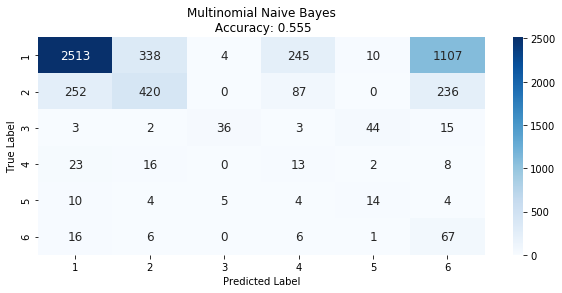

              precision    recall  f1-score   support

           1       0.89      0.60      0.71      4217
           2       0.53      0.42      0.47       995
           3       0.80      0.35      0.49       103
           4       0.04      0.21      0.06        62
           5       0.20      0.34      0.25        41
           6       0.05      0.70      0.09        96

    accuracy                           0.56      5514
   macro avg       0.42      0.44      0.35      5514
weighted avg       0.80      0.56      0.64      5514



In [14]:
cm = confusion_matrix(X_test["pov6"], X_test["predict"])

# Plot the confusion matrix
cm_df = pd.DataFrame(cm, index = [1,2,3,4,5,6], 
                     columns = [1,2,3,4,5,6])

plt.figure(figsize = (10,4))
sns.heatmap(cm_df, 
            annot = True, 
            cmap = "Blues", 
            fmt = 'g', 
            annot_kws = {"size" : 12})

plt.title("Multinomial Naive Bayes\n Accuracy: {0:.3f}".format(accuracy_score(X_test["pov6"], 
                                                                              X_test["predict"])))

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print(classification_report(X_test["pov6"], X_test["predict"]))

#### Bernoulli Model

In [15]:
bernoulli = BernoulliNB()

bernoulli.fit(X_train[variables].values, X_train["pov6"])
prediction = bernoulli.predict(X_test[variables])

X_test["predict"] = prediction
X_test

C:\Users\theta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int,predict
3474,1.0,0.0,1,4,1,115,28,1,0.0,1,...,0,0,0,0,0,0,0.0,0.0,2,1
11305,2.0,0.0,1,4,1,79,22,2,3.0,1,...,0,0,1,0,0,0,0.0,0.0,1,1
9253,0.0,0.0,1,7,1,123,31,1,0.0,1,...,0,0,0,0,0,0,3.0,0.0,1,1
17172,1.0,0.0,1,8,1,3,2,1,0.0,1,...,0,0,0,0,0,0,3.0,0.0,2,1
2778,1.0,0.0,1,8,1,79,22,2,1.0,1,...,0,0,0,0,0,0,0.0,0.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15741,1.0,0.0,1,7,1,8,18,2,3.0,1,...,0,0,0,0,0,0,3.0,0.0,2,2
9988,3.0,0.0,1,8,1,16,17,1,0.0,1,...,1,0,1,1,0,0,5.0,0.0,1,1
10779,0.0,0.0,1,3,1,54,30,1,0.0,1,...,0,0,0,0,0,0,1.0,0.0,1,1
10128,3.0,0.0,1,6,1,106,13,1,0.0,1,...,0,0,1,0,0,0,3.0,0.0,2,1


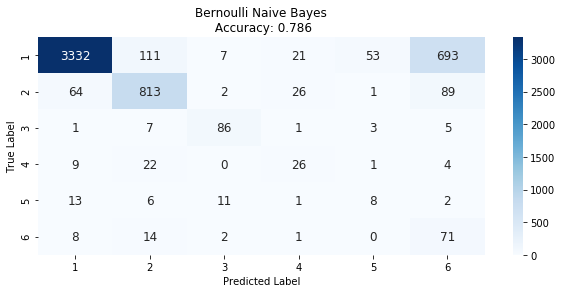

              precision    recall  f1-score   support

           1       0.97      0.79      0.87      4217
           2       0.84      0.82      0.83       995
           3       0.80      0.83      0.82       103
           4       0.34      0.42      0.38        62
           5       0.12      0.20      0.15        41
           6       0.08      0.74      0.15        96

    accuracy                           0.79      5514
   macro avg       0.52      0.63      0.53      5514
weighted avg       0.92      0.79      0.84      5514



In [16]:
cm = confusion_matrix(X_test["pov6"], X_test["predict"])

# Plot the confusion matrix
cm_df = pd.DataFrame(cm, 
                     index = [1,2,3,4,5,6], 
                     columns = [1,2,3,4,5,6])

plt.figure(figsize = (10,4))
sns.heatmap(cm_df, 
            annot = True, 
            cmap = "Blues", 
            fmt = 'g', 
            annot_kws = {"size" : 12})

plt.title("Bernoulli Naive Bayes\n Accuracy: {0:.3f}".format(accuracy_score(X_test["pov6"], 
                                                                            X_test["predict"])))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print(classification_report(X_test["pov6"], X_test["predict"]))

### Training Dataset Groups

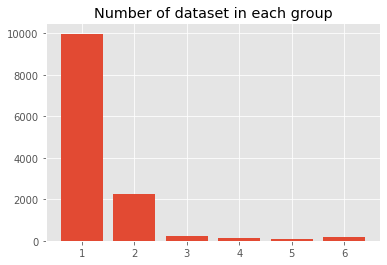

In [20]:
groups = X_train.groupby("pov6")["pov6"].count()

grp_index = []
grp_value = []
for index, value in groups.iteritems():
    grp_index.append(index)
    grp_value.append(value)

plt.bar(grp_index, grp_value)
plt.style.use("ggplot")
plt.title("Number of dataset in each group")
plt.show()

### Results
The Accuracy Scores are as follows:
- Gaussian Model: 0.762
- Multinomial Model: 0.555
- Bernoulli Model: 0.786

Based on these results, Bernoulli Model has the highest accuracy score, followed by Gaussian. Bernoulli Model will also be a better predictor as it's f1-score for each of the groups is higher as comapred to the Gaussian Model. The Gaussian Model wrongly predicts a large number of data from group 2 to 6 as group 1. This reduced its reliability to a large extent.

### Predicting the Test Dataset <i>(testdata.csv)</i>

In [18]:
df_test["pov6_prediction"] = bernoulli.predict(df_test[variables])
df_test

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,var9_int,pov6_prediction
0,1.0,0.0,1,11,1,47,8,2,1.0,1,...,0,0,0,0,0,1,0,3.0,0,6
1,2.0,0.0,1,11,1,65,27,1,0.0,1,...,0,0,0,0,0,0,0,3.0,1,4
2,2.0,0.0,1,6,1,65,27,2,1.0,1,...,0,0,0,0,0,1,0,3.0,1,4
3,1.0,0.0,1,3,1,3,2,1,0.0,1,...,0,0,0,0,0,0,0,0.0,0,1
4,1.0,0.0,1,5,1,83,3,1,0.0,1,...,0,0,0,1,0,0,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,1.0,0.0,1,6,1,7,48,1,0.0,1,...,1,0,0,0,0,0,0,3.0,1,1
4591,3.0,0.0,1,9,1,79,22,2,1.0,1,...,0,0,0,0,0,0,0,0.0,1,6
4592,3.0,0.0,1,9,1,79,22,2,3.0,1,...,1,1,1,0,0,0,0,2.0,1,6
4593,0.0,0.0,1,5,1,133,25,1,0.0,1,...,0,0,0,0,0,0,0,1.0,1,5


In [19]:
df_test.to_csv("testdata_with_prediction.csv")
print("export complete!")

export complete!
